In [196]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
df = pd.read_csv("DATA/dist_data.csv")
df.head()

,distPixObs,distReal
0,105,0.25
1,126,0.50
2,144,0.75
3,157,1.00
4,167,1.25


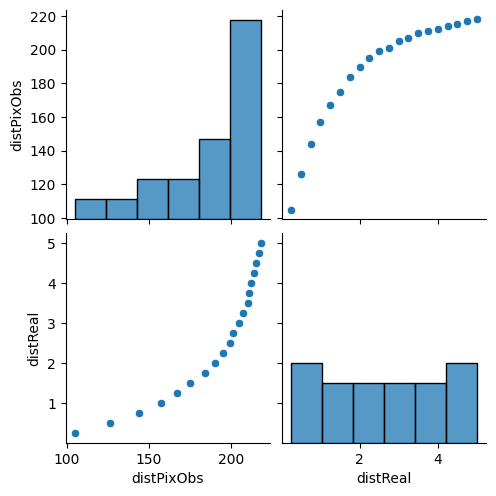

In [197]:
sns.pairplot(df)

In [198]:
X = df["distPixObs"]
y = df["distReal"]
X.head()

0    105
1    126
2    144
3    157
4    167
Name: distPixObs, dtype: int64

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((16,), (4,))

In [200]:
lin = LinearRegression()

# Reshape X_train to be 2D as required by scikit-learn
lin.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [201]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X_train.values.reshape(-1, 1))
X_test_Poly = poly.transform(X_test.values.reshape(-1,1))
poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

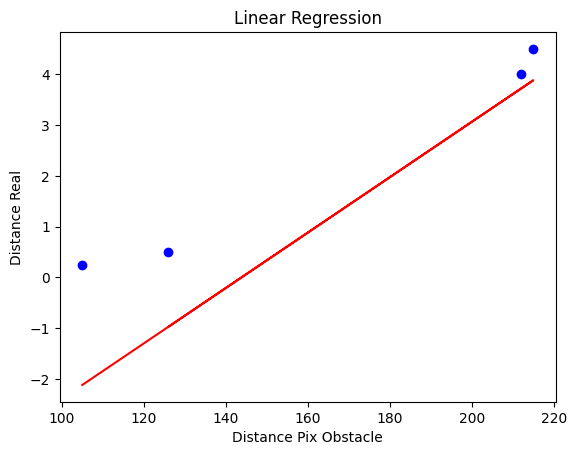

In [202]:
plt.scatter(X_test, y_test, color='blue')

y_lin_true = lin.predict(X_test.values.reshape(-1,1))

plt.plot(X_test.values.reshape(-1,1), y_lin_true, color='red')
plt.title('Linear Regression')
plt.xlabel('Distance Pix Obstacle')
plt.ylabel('Distance Real')
plt.show()

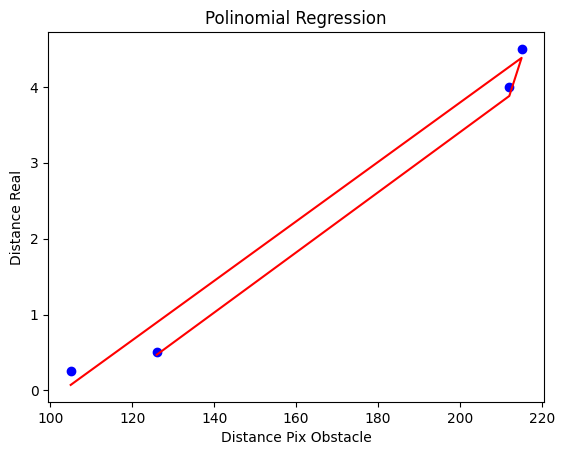

In [203]:
plt.scatter(X_test, y_test, color='blue')
y_poly_true = lin2.predict(X_test_Poly)
plt.plot(X_test.values.reshape(-1,1), y_poly_true, color='red')
plt.title('Polinomial Regression')
plt.xlabel('Distance Pix Obstacle')
plt.ylabel('Distance Real')
plt.show()

In [204]:
print(f"Linear R2_score: {r2_score(y_test, y_lin_true)}")
print(f"Poly R2_score: {r2_score(y_test, y_poly_true)}")
print(f"RMSE Poly: {root_mean_squared_error(y_test, y_poly_true)}")
print(f"MSE Poly: {mean_squared_error(y_test, y_poly_true)}")


Linear R2_score: 0.45838674386679523
Poly R2_score: 0.996005454633192
RMSE Poly: 0.12309015292361963
MSE Poly: 0.015151185746760066


In [205]:
# Predict the real distance for a pixel value of 105 using the polynomial model
test_value = [[220]]  # shape (1, 1), as expected
test_data = poly.fit_transform(test_value)
lin2.predict(test_data)

array([5.46057935])

In [206]:
# Get coefficients
coefs = lin2.coef_
intercept = lin2.intercept_

# Build equation as a string
terms = [f"{intercept}"]
for i, coef in enumerate(coefs[1:], start=1):
    terms.append(f"{coef} * x^{i}")

equation = " + ".join(terms)
print("Polynomial Regression Equation:")
print("y =", equation)

Polynomial Regression Equation:
y = -5.841693304202124 + 1.8375309542455963e-08 * x^1 + 1.0323002478607138e-06 * x^2 + 5.588798195193646e-05 * x^3 + -1.0760606768757821e-06 * x^4 + 8.290957051959435e-09 * x^5 + -2.94604071815811e-11 * x^6 + 4.026117335430513e-14 * x^7


In [207]:
from sklearn.svm import SVR
svr = SVR(C=2, kernel="poly", degree=3, gamma="scale")
svr.fit(X_train.values.reshape(-1,1), y_train)

SVR(C=2, kernel='poly')

In [208]:
y_pred_svr = svr.predict(X_test.values.reshape(-1,1))
print(f"SVR R2_SCORE: {r2_score(y_test, y_pred_svr)}")

SVR R2_SCORE: 0.8958666118417825


In [209]:
from sklearn.ensemble import RandomForestRegressor

r_forest = RandomForestRegressor(n_estimators=1, bootstrap=False)
r_forest.fit(X_train.values.reshape(-1, 1), y_train)

RandomForestRegressor(bootstrap=False, n_estimators=1)

In [210]:

y_pred_rforest = r_forest.predict(X_test.values.reshape(-1,1))
print(f"RandomForest: {r2_score(y_test, y_pred_rforest)}")
y_train_pred = r_forest.predict(X_train.values.reshape(-1, 1))
print(f"mse: {mean_squared_error(y_test, y_pred_rforest)}")

RandomForest: 0.9711637487126673
mse: 0.109375


In [211]:
from micromlgen import port
print(port(r_forest))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class RandomForestRegressor {
                public:
                    /**
                    * Predict class for features vector
                    */
                    float predict(float *x) {
                        float y_pred = 0;
                        // tree #1
                        if (x[0] <= 203.0) {
                            if (x[0] <= 179.5) {
                                if (x[0] <= 162.0) {
                                    if (x[0] <= 150.5) {
                                        y_pred += 0.75;
                                    }

                                    else {
                                        y_pred += 1.0;
                                    }
                                }

                                else {
                                    if (x[0] <= 171.0) {
                                        y_pre